In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [58]:
df=pd.read_csv("retail_customer_data.csv")
df

,CustomerID,City,ProductCategory,Price,Quantity,TotalSale,PurchaseDate
0,1771,Peshawar,Electronics,173.70,4.0,694.80,2024-01-01
1,1170,Lahore,Clothing,412.16,4.0,1648.64,2024-08-30
2,1857,Peshawar,Home Decor,445.68,2.0,891.36,2024-08-15
3,1347,Lahore,Beauty,279.94,2.0,559.88,2024-08-12
4,1460,Peshawar,Beauty,142.30,2.0,284.60,2024-06-28
...,...,...,...,...,...,...,...
245,1699,Karachi,Electronics,202.26,1.0,202.26,2024-02-06
246,1564,Islamabad,Electronics,NaN,4.0,NaN,2024-05-22
247,1475,Islamabad,Home Decor,219.76,2.0,439.52,2024-02-07
248,1241,Quetta,Electronics,39.33,1.0,39.33,2024-01-17


In [59]:
df.isnull().sum()

CustomerID          0
City                0
ProductCategory     0
Price              20
Quantity           10
TotalSale          20
PurchaseDate        0
dtype: int64

In [60]:
df.dropna(axis=0, inplace=True)

In [61]:
df.isnull().sum()

CustomerID         0
City               0
ProductCategory    0
Price              0
Quantity           0
TotalSale          0
PurchaseDate       0
dtype: int64

In [62]:
df.shape


(212, 7)

In [63]:
df.drop_duplicates(inplace=True)

In [64]:
df.shape

(212, 7)

In [161]:
#  Extract useful date parts
df["PurchaseDate"]=pd.to_datetime(df["PurchaseDate"])
df["Month"]=df["PurchaseDate"].dt.to_period("M")
df["DayOfWeek"]=df["PurchaseDate"].dt.day_name()
df['Hours'] = df['PurchaseDate'].dt.hour

In [68]:
# total revanue generated 
total_sales=df.groupby("ProductCategory")["TotalSale"].sum().sort_values(ascending=True)
total_sales

ProductCategory
Grocery        19833.15
Clothing       21086.73
Books          21558.51
Beauty         23967.28
Home Decor     27643.86
Electronics    27648.36
Name: TotalSale, dtype: float64

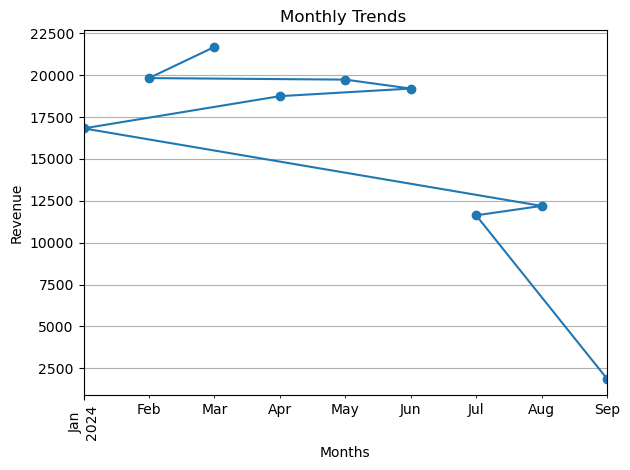

In [72]:
#revenue trends by months
monthly_revenue=df.groupby("Month")["TotalSale"].sum().sort_values(ascending=True)
monthly_revenue
monthly_revenue.plot(marker="o", title="Monthly Trends ")
plt.xlabel("Months")
plt.ylabel("Revenue")
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()

In [73]:
monthly_revenue

Month
2024-09     1885.81
2024-07    11633.94
2024-08    12195.94
2024-01    16823.91
2024-04    18748.16
2024-06    19200.97
2024-05    19735.06
2024-02    19827.07
2024-03    21687.03
Freq: M, Name: TotalSale, dtype: float64

In [79]:
# average purchase per customer 
avg_customer=df.groupby("CustomerID")["TotalSale"].sum().mean().round(2)
avg_customer

766.15

In [88]:
# top 5 customer
avg_customer.sort_values(ascending=False).head()

CustomerID
1957    2804.05
1502    2703.04
1942    2438.55
1406    2312.82
1484    2198.08
Name: TotalSale, dtype: float64

In [93]:
# find frequent buyers 
freq_buyer=df["CustomerID"].value_counts().head()
freq_buyer

CustomerID
1957    4
1871    3
1270    2
1130    2
1027    2
Name: count, dtype: int64

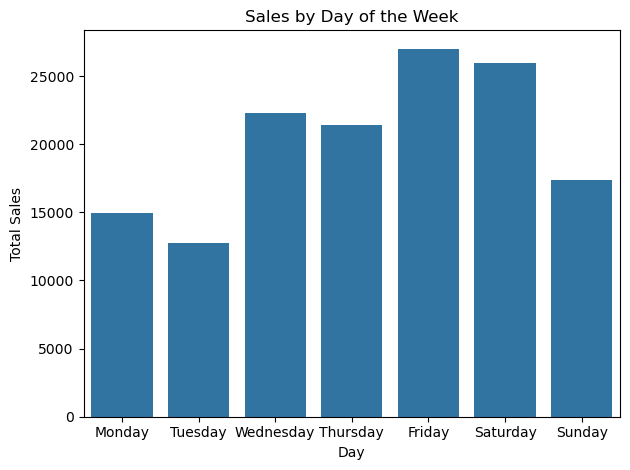

In [119]:
#sales by day of week 
by_day=df.groupby("DayOfWeek")["TotalSale"].sum().sort_values(ascending=False).reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

sb.barplot(x=by_day.index, y=by_day.values)
plt.title("Sales by Day of the Week")
plt.ylabel("Total Sales")
plt.xlabel("Day")
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_5820\3595977495.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=city_rev.index,y=city_rev.values,palette="Oranges")


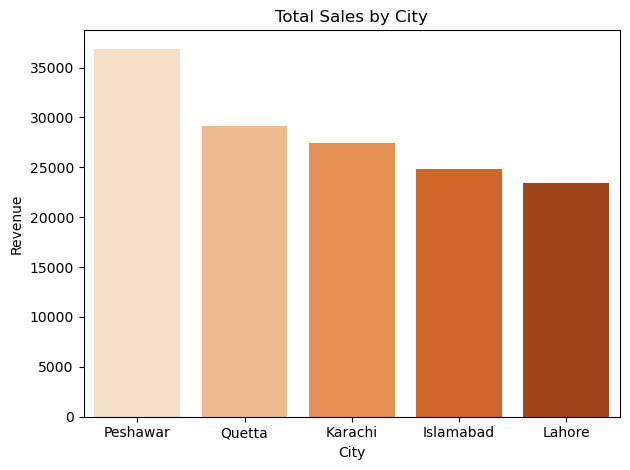

In [131]:
# revenue city wise
city_rev=df.groupby("City")["TotalSale"].sum().sort_values(ascending=False)
city_rev
sb.barplot(x=city_rev.index,y=city_rev.values,palette="Oranges")
plt.title("Total Sales by City")
plt.ylabel("Revenue")
plt.xlabel("City")
plt.tight_layout()
plt.show()


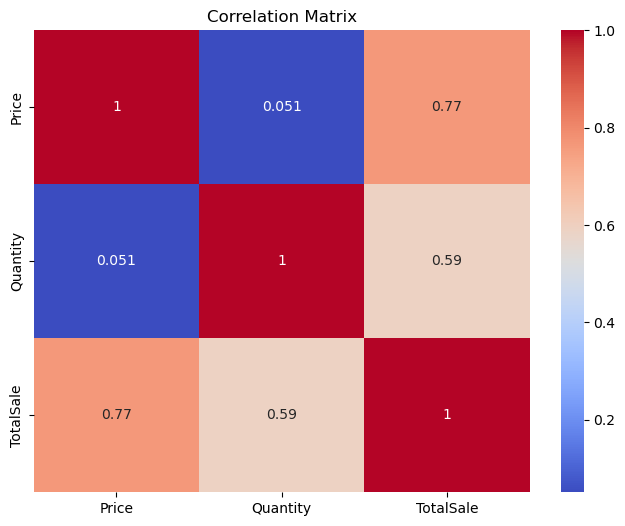

In [150]:
# heat map
plt.figure(figsize=(8, 6))
sb.heatmap(df[['Price', 'Quantity', 'TotalSale']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [155]:
# top two categries
total_sales.sort_values(ascending=False).head(2).index.tolist()# to list function make to list 

['Electronics', 'Home Decor']

In [156]:
city_rev.sort_values(ascending=False).head(2).index.tolist()

['Peshawar', 'Quetta']

In [157]:
by_day.sort_values(ascending=False).head(2).index.tolist()

['Friday', 'Saturday']